In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## load data

In [10]:
# folder that has the data
folder = r'C:\Users\weaveae\OneDrive - University of Cincinnati\Classes\S02 Physics 2\Lab'

# build a dictionary of dataframes from the different runs, and add a column for the run number
rawdat = {"dat_{}".format(i): pd.read_csv("{}\\harmonic osc data\\Run {} sg.csv".format(folder, i)).assign(run=i) for i in range(1, 6)}

# rename the columns in each df to be time, position, velocity, and run number, and then reorganize the columns so run is first
for i in range(1, 6):
    rawdat['dat_{}'.format(i)].columns = ['time', 'position', 'velocity', 'run']
    rawdat['dat_{}'.format(i)] = rawdat['dat_{}'.format(i)][['run', 'time', 'position', 'velocity']]

# combine the dataframes into one
df = pd.concat([rawdat['dat_{}'.format(i)] for i in range(1, 5)])

# map the mass to the run number
mass_map = {"{}".format(i+1):[0.02,0.07,0.17,0.22,0.24][i] for i in range(5)}
df['mass'] = df['run'].astype(str).map(mass_map)

df.head()

,run,time,position,velocity,mass
0,1,0.00,0.33,NaN,0.02
1,1,0.05,0.32,-0.26,0.02
2,1,0.10,0.30,-0.43,0.02
3,1,0.15,0.27,-0.51,0.02
4,1,0.20,0.25,-0.49,0.02


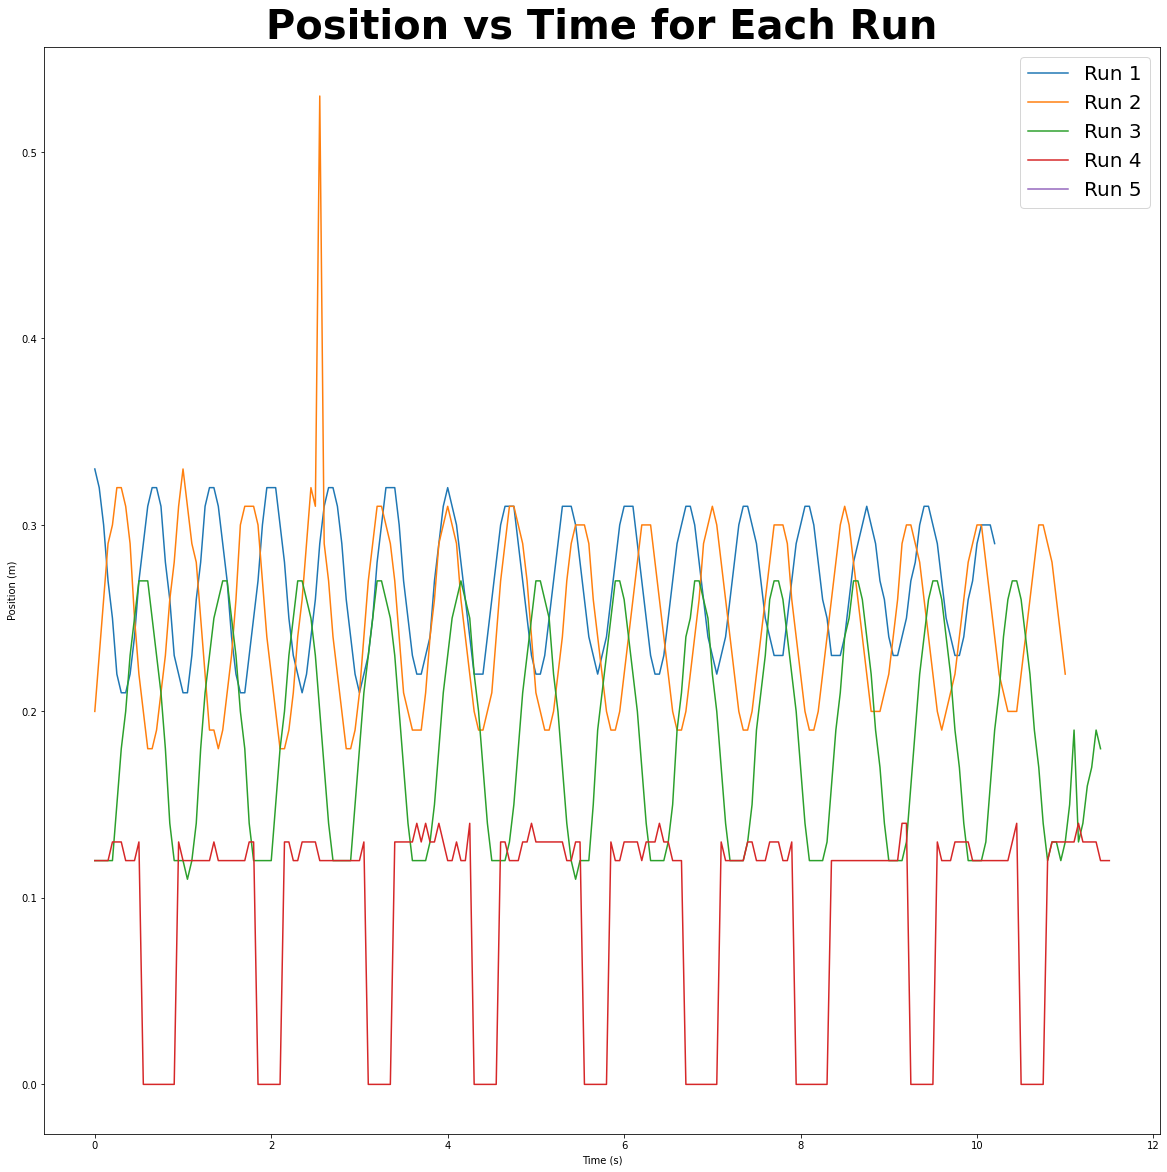

In [23]:
# plot the data (position vs time) for each run
for i in range(1, 6):
    plt.plot(df[df['run']==i]['time'], df[df['run']==i]['position'], label='Run {}'.format(i))

# add labels and a legend
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

# make the plot larger
plt.rcParams['figure.figsize'] = [20, 20]

# add a title to the plot
plt.title('Position vs Time for Each Run')

# plot the data (position vs time) for each run
plt.show()


##### Because run #4 looks like an equipment malfunction and run #5 is missing entirely, they will be removed from further consideration:

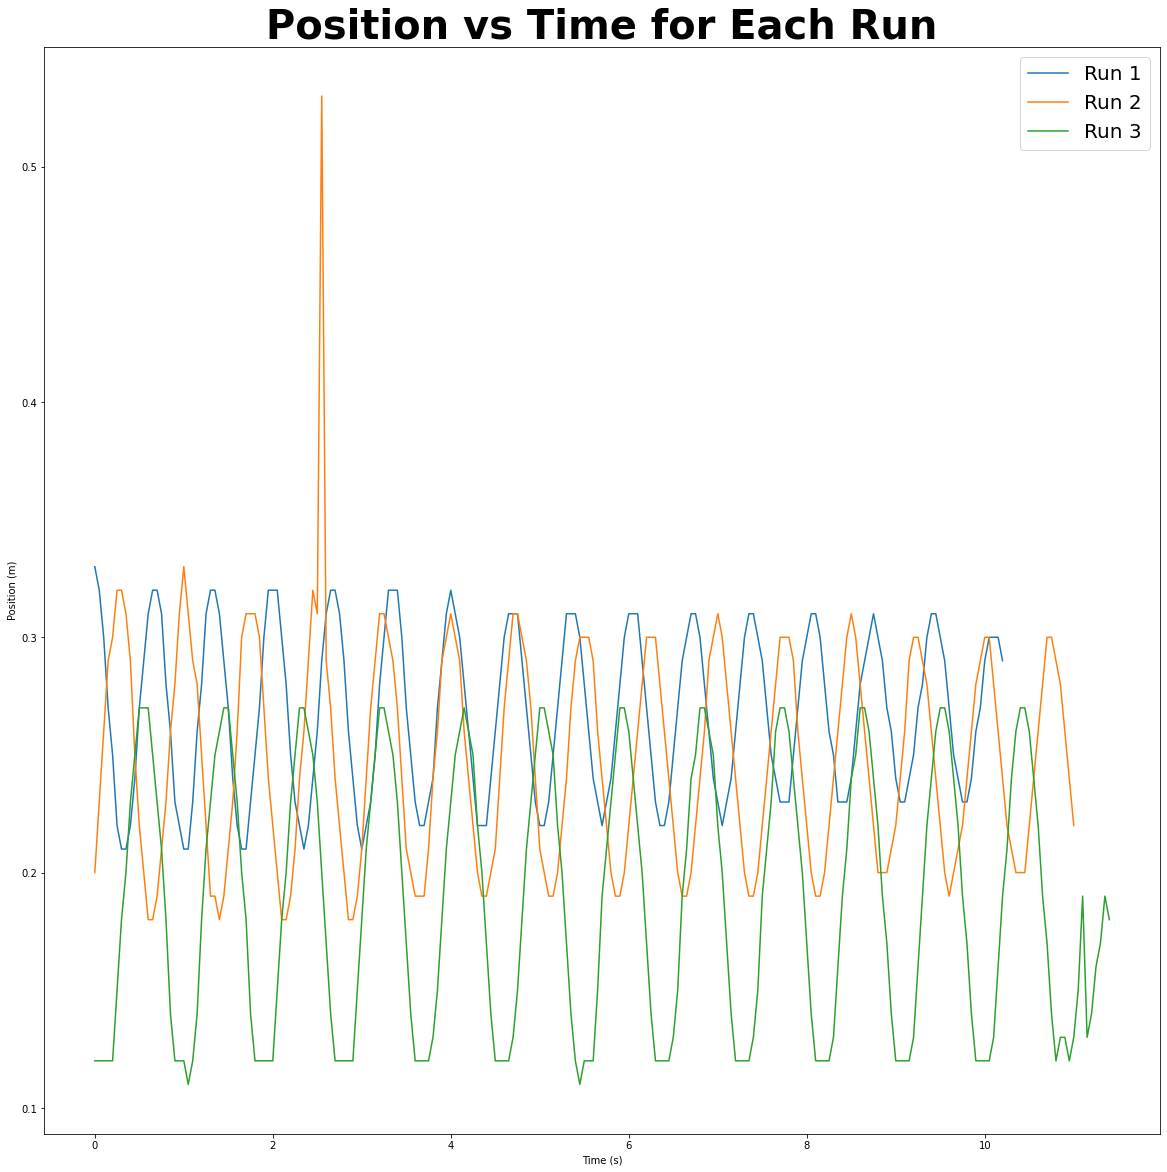

In [25]:
# drop runs 4 and 5
df = df.loc[np.logical_and(df['run'] != 5, df['run'] != 4), :]

# remake the same plot as above
for i in range(1, 4):
    plt.plot(df[df['run']==i]['time'], df[df['run']==i]['position'], label='Run {}'.format(i))
    
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 20]
plt.title('Position vs Time for Each Run')
plt.show()

#### $T^2$ vs $M$
$$ T^2 = \left( \frac{4\pi^2}{k} \right) M + \left[ 4 \pi^2 \left( \frac{cm_{spring}}{k} \right)  \right]$$  

Eg this means that $T^2$ is linear in $M$ with slope $\left( \frac{4\pi^2}{k} \right)$ and intercept $\left[ 4 \pi^2 \left( \frac{cm_{spring}}{k} \right)  \right]$


In [26]:
# determine the period of each run
# the period is the average time between peaks
# the peaks are the LOCAL maxima of the position vs time plot
# the peaks are the points where the velocity is 0

# make a new column for the velocity squared
df['velocity2'] = df['velocity']**2

# make a new column for the velocity squared moving average
df['velocity2_ma'] = df['velocity2'].rolling(10).mean()




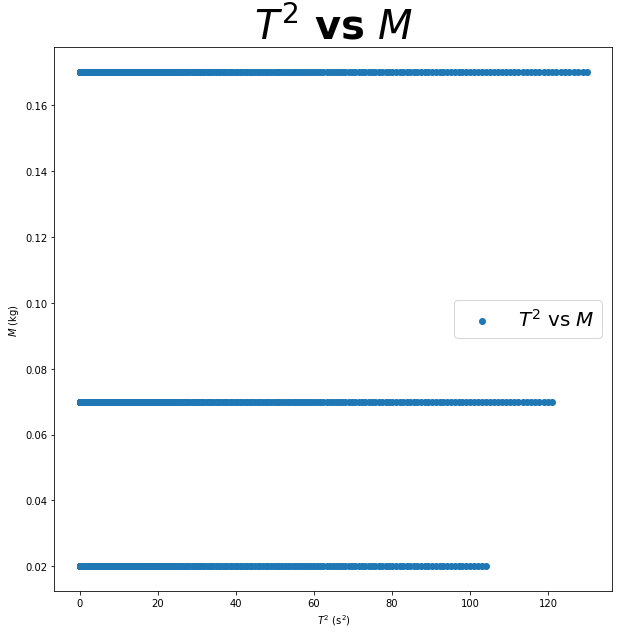

In [27]:
# plot the data
plt.figure(figsize=(10, 10))
plt.scatter(T2, M, label='$T^2$ vs $M$')
plt.xlabel('$T^2$ (s$^2$)')
plt.ylabel('$M$ (kg)')
plt.title('$T^2$ vs $M$')
plt.legend()
plt.show()
